In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
cols_demos = [
    'MatchId',
    'MapName' ,
    'WinnerId' ,
    'WinnerScore' ,
    'WinnerFirstHalfScore' ,
    'WinnerSecondHalfScore' ,
    'WinnerFirstHalfSide' ,
    'WinnerOTScore' ,
    'LoserId' ,
    'LoserScore' ,
    'LoserFirstHalfScore' ,
    'LoserSecondHalfScore' ,
    'LoserFirstHalfSide' ,
    'LoserOTScore' ,
    'DemoParsed' ,
    'Created' ,
    'Updated']
cols_map_picks = [
    'MatchId',
    'MapName',
    'DecisionOrder',
    'DecisionTeamId',
    'OtherTeamId',
    'Decision',
    'Created',
    'Updated']
cols_matches = [
    'MatchId',
    'HLTVMatchId',
    'CompetitionId',
    'HLTVLink',
    'MatchType',
    'MatchDate',
    'MatchTime',
    'Stars',
    'Slug',
    'WinnerId',
    'WinnerScore',
    'LoserId',
    'LoserScore',
    'Created',
    'Updated']
cols_teams = [
    'TeamId',
    'HLTVTeamId',
    'HLTVLink',
    'TeamName',
    'Country',
    'Twitter',
    'Facebook',
    'Created',
    'Updated']

demos = pd.read_csv('../data/demos.csv',names = cols_demos)
map_picks = pd.read_csv('../data/map_picks.csv',names = cols_map_picks)
matches = pd.read_csv('../data/matches.csv',names = cols_matches)
teams = pd.read_csv('../data/teams.csv',names = cols_teams)

In [4]:
# All team IDs
team_record = pd.DataFrame(teams['TeamId'].unique(),columns=['TeamId'])
# Wins and losses by team ID
wins = demos['WinnerId'].value_counts()
losses = demos['LoserId'].value_counts()
# merge wins and losses 
team_record = team_record.merge(wins,left_on='TeamId',right_index=True,how='left').fillna(0).astype(int)
team_record = team_record.merge(losses,left_on='TeamId',right_index=True,how='left').fillna(0).astype(int)
team_record.rename(columns={"WinnerId": "Wins", "LoserId": "Losses"},inplace=True)
team_record['Matches'] = team_record['Wins']+team_record['Losses'].astype(int)
team_record['Win_percentage'] = (team_record['Wins']/team_record['Matches']).fillna(0)

### Matches played distribution

Teams in database:  636
Teams with 0 matches:  10
Teams with 5+ matches:  401
Teams with 10+ matches:  307
Teams with 50+ matches:  139
Teams with 100+ matches:  92
Teams with 200+ matches:  34


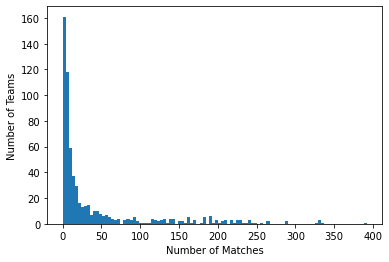

In [5]:
plt.hist(team_record['Matches'],bins=100)
plt.ylabel('Number of Teams')
plt.xlabel('Number of Matches')
print("Teams in database: ",team_record.shape[0])
print("Teams with 0 matches: ",(team_record['Matches']==0).sum())
print("Teams with 5+ matches: ",(team_record['Matches']>5).sum())
print("Teams with 10+ matches: ",(team_record['Matches']>10).sum())
print("Teams with 50+ matches: ",(team_record['Matches']>50).sum())
print("Teams with 100+ matches: ",(team_record['Matches']>100).sum())
print("Teams with 200+ matches: ",(team_record['Matches']>200).sum())

### Team win percentage distribution
I've removed teams with fewer than min_matches matches.

In [18]:
min_matches = 5
team_record_overmin = team_record[team_record['Matches']>min_matches]

Text(0, 0.5, 'Number of teams')

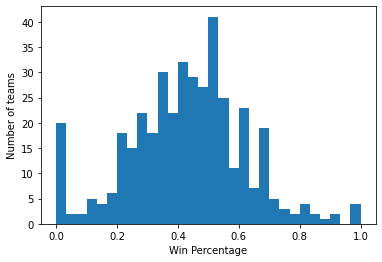

In [19]:
plt.hist(team_record_overmin['Win_percentage'],bins=30)
plt.xlabel('Win Percentage')
plt.ylabel('Number of teams')

### Win percentage by team by map

In [48]:
a = demos.groupby(['WinnerId','MapName']).count()['MatchId']
a[(2,'de_inferno')]

1

In [45]:
win_cols = [s+'_wins' for s in demos['MapName'].unique()]
match_cols = [s+'_matches' for s in demos['MapName'].unique()]
win_pct_cols = [s+'_win_pct' for s in demos['MapName'].unique()]
team_record = team_record.reindex(columns = team_record.columns.tolist() + win_cols + match_cols + win_pct_cols)
team_record

,TeamId,Wins,Losses,Matches,Win_percentage,de_inferno_wins,de_nuke_wins,de_dust2_wins,de_vertigo_wins,de_mirage_wins,...,de_inferno_win_pct,de_nuke_win_pct,de_dust2_win_pct,de_vertigo_win_pct,de_mirage_win_pct,de_train_win_pct,de_overpass_win_pct,de_cache_win_pct,de_tuscan_win_pct,de_cobblestone_win_pct
0,1,0,2,2,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,4,6,0.333333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4,0,4,1.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,48,55,103,0.466019,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,147,108,255,0.576471,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
631,635,0,2,2,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
632,636,0,2,2,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
633,637,0,3,3,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
634,638,0,2,2,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [46]:
team_record[team_record['TeamId']==631]['de_nuke_wins']

627   NaN
Name: de_nuke_wins, dtype: float64

In [53]:
# a[(a['MapName']=='de_inferno') and (a['WinnerId']==3)]
for t in team_record['TeamId']:
    for m in demos['MapName'].unique():
        try:
            team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
            print("Success")
        except KeyError:
            pass


<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success
Success


<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  team_record[team_record['TeamId']==t][m+'_wins'] = a[(t,m)]
<ipython-input-53-34039774ccaa>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

### Map Selection and Veto percentage by team

In [55]:
len(win_cols)

10

In [ ]:
matches